In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Customers Churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tenure is 0 no total charges are recorded

In [58]:

# Replace empty strings with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Option 1: Drop rows with NaN in TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Option 2: Fill NaN with a default value (e.g., 0)
# df["TotalCharges"] = df["TotalCharges"].fillna(0)

# Convert to float
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [31]:
df.isnull().sum().sum()

np.int64(0)

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



# Converted 0 and 1 values of senior citizen by yes/no to make it easy to understand

In [216]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: "no", 1: "yes"})
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/tmp/ipykernel_3015/2276852475.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette="Set2")


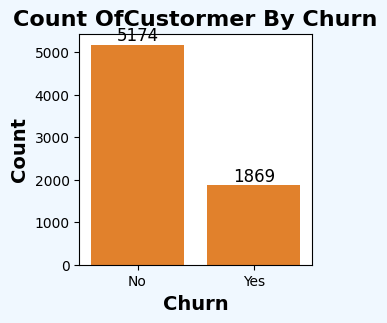

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3)) 


ax = sns.countplot(x='Churn', data=df, palette="Set2")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black')

    plt.title("Customer Count by Churn", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Churn", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='black')
    
ax = sns.countplot(x='Churn', data=df)

plt.gcf().set_facecolor('#f0f8ff')  # Light blue figure background
ax.set_facecolor('#ffffff')  

plt.title("Count OfCustormer By Churn",  fontsize=16, fontweight='bold')
plt.show()



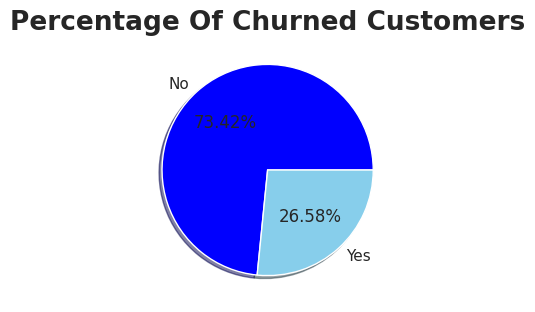

In [207]:
import matplotlib.pyplot as plt
gb = df.groupby("Churn").size()
plt.figure(figsize=(3, 8)) 
plt.pie(gb, labels=gb.index, autopct='%1.2f%%', colors=['#0000FF', '#87CEEB'], shadow=True)
explode = (0.1, 0)  
# Slightly separate the first slice
plt.title('Percentage Of Churned Customers', fontsize=19, fontweight='bold')
plt.tight_layout()
plt.show()

# You can add (startangle=90) func to start pie chart from 90 angle



# From the given pie chart we can conclude that 26.58% of our customers have churned out.
# Now we will understand the reason behind it.


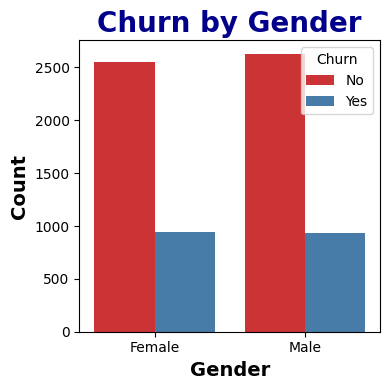

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

# Create a count plot for the "Gender" column
sns.countplot(x = "gender", data = df, hue = "Churn",  palette="Set1")

plt.title("Churn by Gender", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Gender", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()


# Created Without Percentage Of Churned SeniorCitizen

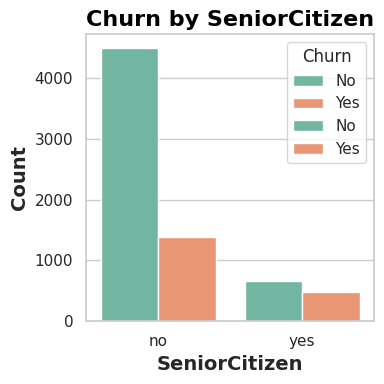

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

# Create a count plot for the "Gender" column
sns.countplot(x="SeniorCitizen", data = df, hue = "Churn",  palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black')


sns.countplot(x="SeniorCitizen", data=df, hue="Churn", palette="Set2")

plt.title("Churn by SeniorCitizen", fontsize=16, fontweight='bold', color='#000000')
plt.xlabel("SeniorCitizen", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.title("Churn by SeniorCitizen", fontsize=16, fontweight='bold', color='#000000')

plt.tight_layout()
plt.show()

# Created With Percentage Of Churned SeniorCitizen

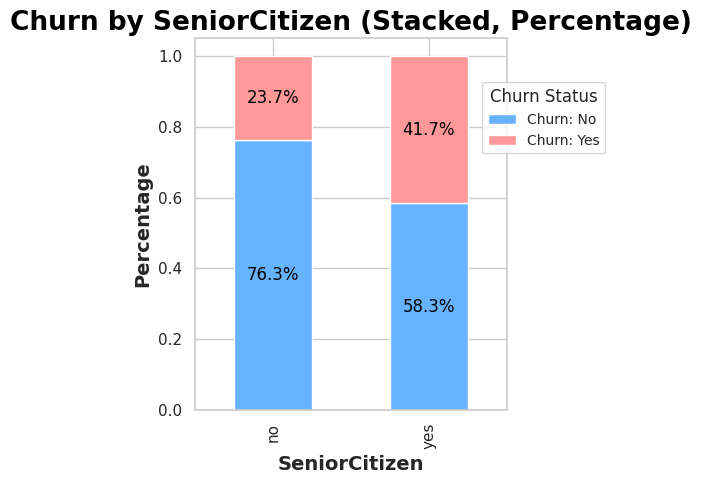

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0 and 1 with 'No' and 'Yes' in the 'SeniorCitizen' column
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Calculate percentage for each category (Churn: Yes, No) within each SeniorCitizen category
churn_percentage = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

churn_percentage.plot(kind='bar', stacked=True, figsize=(5,5), color=['#66b3ff', '#ff9999'])

# Percentage labels to each bar 
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # Get the position of the rectangle
    plt.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center', fontsize=12, color='black')

# Title and labels
plt.title("Churn by SeniorCitizen (Stacked, Percentage)", fontsize=19, fontweight='bold', color='black')
plt.xlabel("SeniorCitizen", fontsize=14, fontweight='bold')
plt.ylabel("Percentage", fontsize=14, fontweight='bold')

plt.legend(labels=["Churn: No", "Churn: Yes"], title="Churn Status", bbox_to_anchor = (0.9,0.9), fontsize=10)

plt.tight_layout()
plt.show()


# Comparatively a greater percentage of people in category of senior citizen have churned out

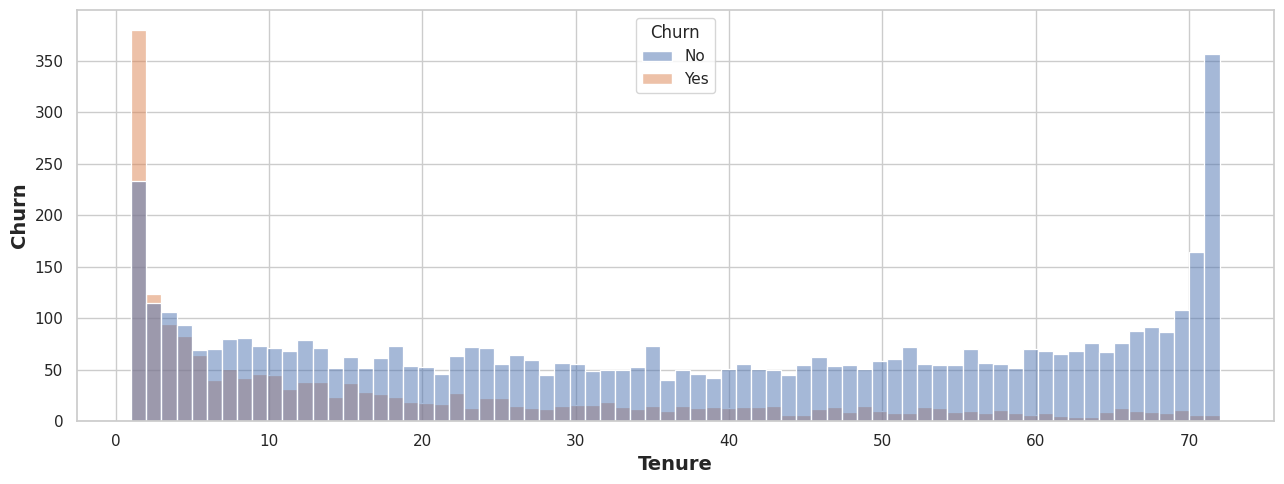

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))


sns.histplot(x="tenure", data = df, bins = 72, hue = "Churn")
plt.xlabel("Tenure", fontsize=14, fontweight='bold')
plt.ylabel("Churn", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# people who have used our services for longer period of time they stayed and people who have used our service for only one to two months have churned out

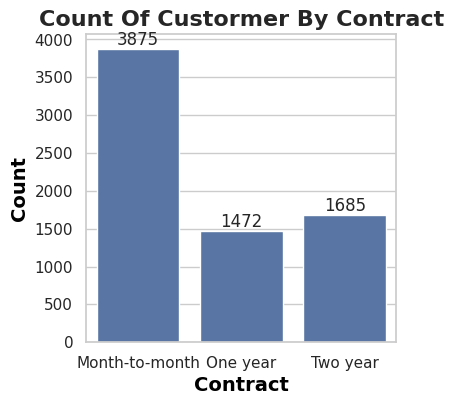

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4)) 

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black')

plt.xlabel("Contract", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='black')

ax = sns.countplot(x='Contract', data=df)
ax.bar_label(ax.containers[0])
 

plt.title("Count Of Custormer By Contract",  fontsize=16, fontweight='bold')
plt.show()


# People who have month to month contract are likely to churn than from those who have one or two years of contract

In [257]:
df.columns.tolist()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

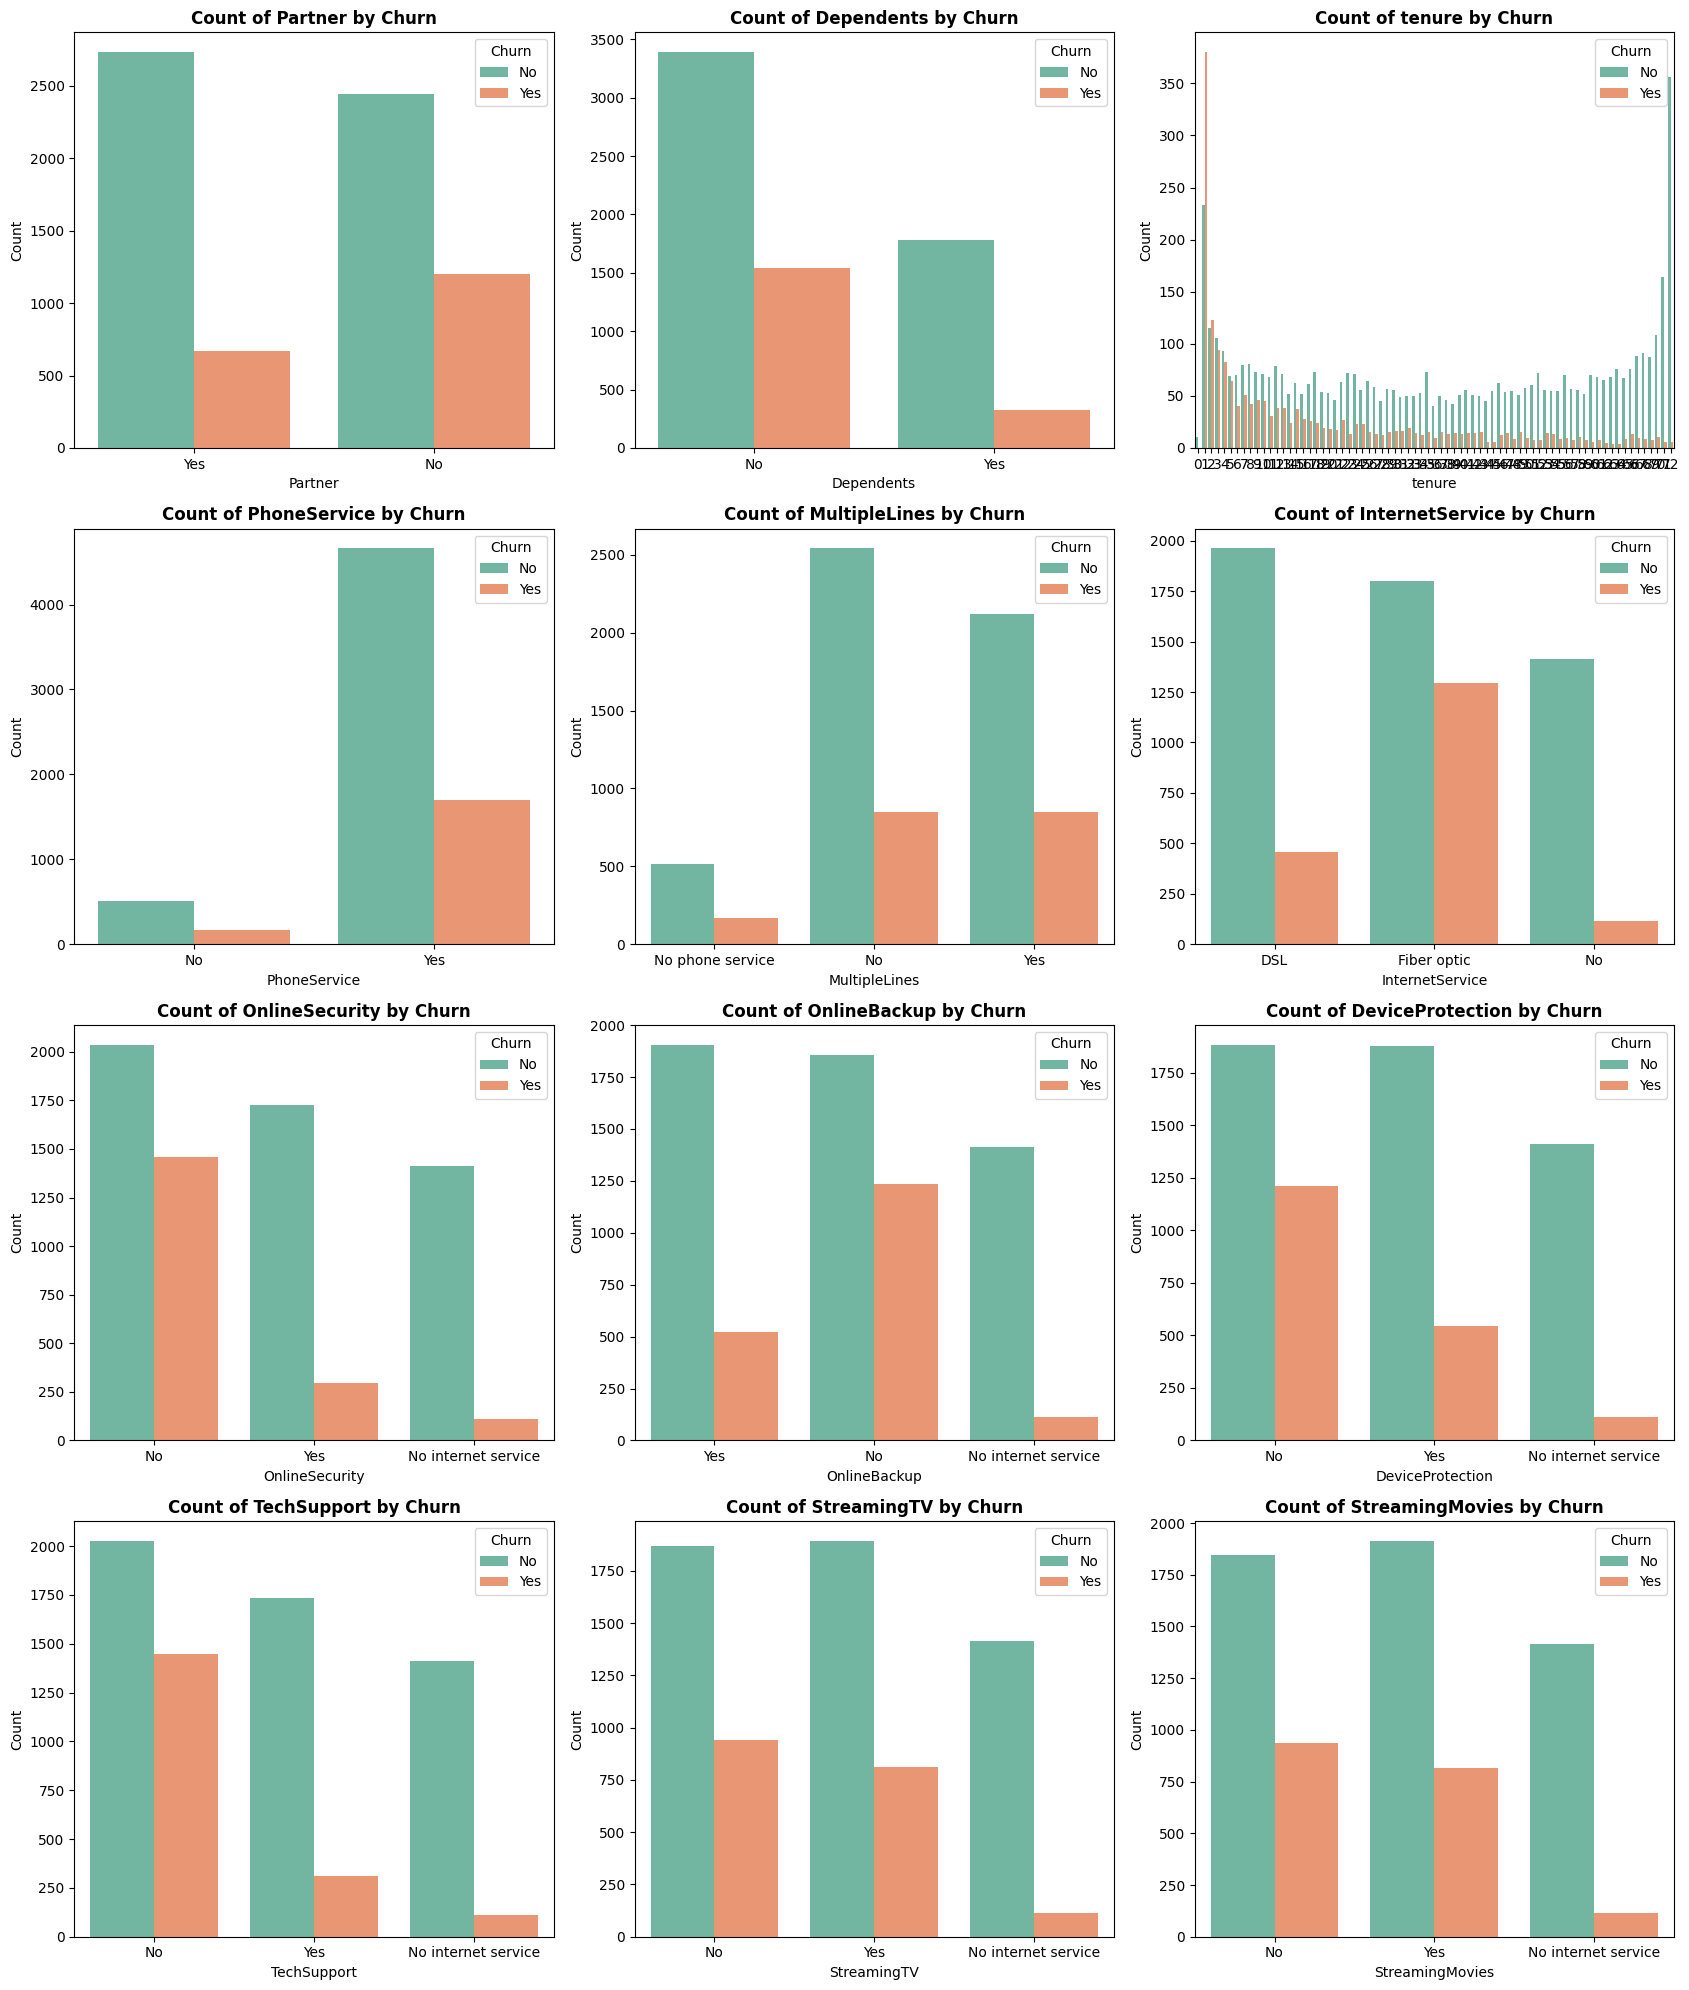

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns you want to plot
columns = [
    'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set the number of rows and columns for subplots
n_cols = 3  # Adjust based on desired layout
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)  # Calculate rows dynamically

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 5*n_rows))

# Flatten axes array to easily iterate over
axes = axes.flatten()

# Iterate over each column and create a count plot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn', palette='Set2')
    axes[i].set_title(f"Count of {column} by Churn", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)

# Hide unused axes
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#Customers with partners and dependents are less likely to churn compared to those without.
Customers with longer tenure tend to have lower churn rates.
The presence of phone service, multiple lines, and fiber optic internet service appears to be associated with lower churn rates.
Conversely, customers without online security, online backup, device protection, tech support, streaming TV, and streaming movies exhibit higher churn rates.

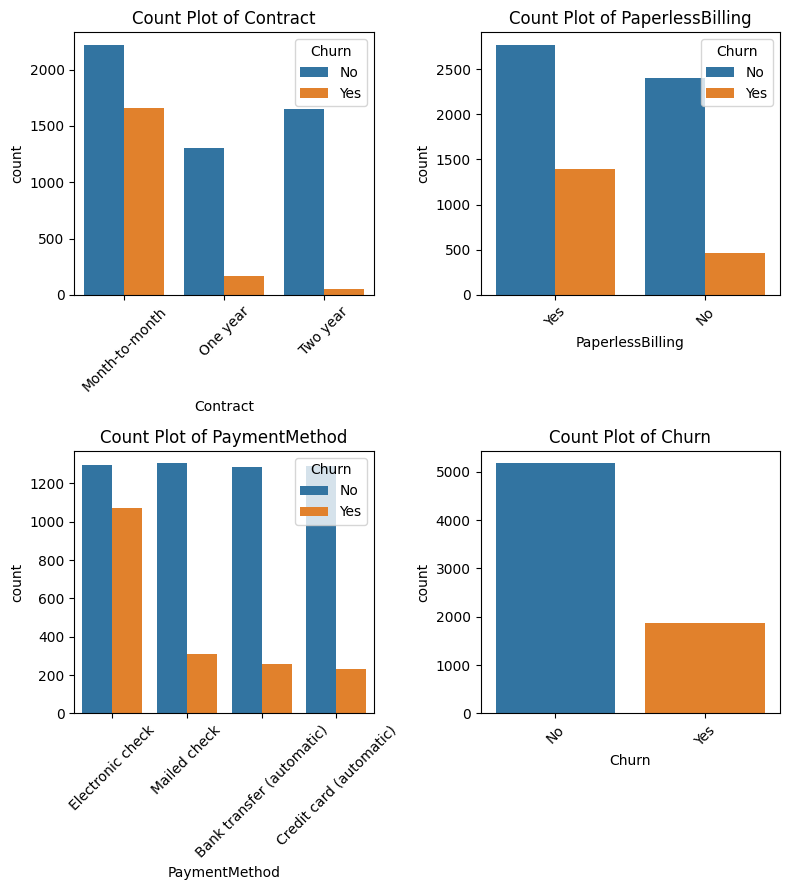

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (replace with the correct path if needed)
# df = pd.read_csv("your_data.csv")

# Assuming df is your DataFrame, you should first convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# List of categorical columns
categorical_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Create a count plot for each categorical column
plt.figure(figsize=(8, 9))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.countplot(data=df, x=column,  hue='Churn')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#Customers with month-to-month contracts have a significantly higher churn rate than those with one-year or two-year contracts.
Customers with paperless billing have a slightly higher churn rate than those without.
Payment method appears to have little impact on churn rates.